## Clustering with API

An attempt at running some clustering tests and graphing using the newly-built api

In [1]:
import numpy as np

import sys
sys.path.append('../lib')
from Dab import Dab
from Gmt import read_gmt

import igraph
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = "FFFFFF"
plt.rcParams['grid.color'] = "DDDDDD"

In [2]:
d = Dab("../data/brain.dab")
go_terms = read_gmt('../gene_ontology/gobp_human.closed.gmt')

In [3]:
import clustering
reload(clustering)
from clustering import *

In [5]:
term_sizes = [10, 50, 100]
generators = [NonOverlappingGOTerms(d, go_terms, term_size=(k,k*2), n=2) for k in term_sizes]

frame = run_clustering_tests(
    IndependentVar("Term Size", generators, term_sizes), 
    GraphTransform(), 
    Louvain(), 
    [AdjustedRand()]
)

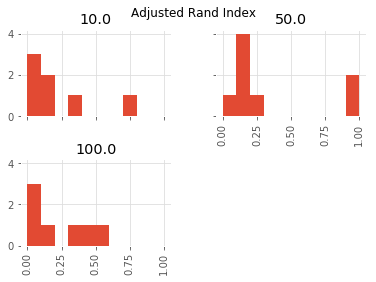

In [32]:
frame.hist('Adjusted Rand Index', by='Term Size', range=(0,1), sharex=True, sharey=True)
plt.suptitle("Adjusted Rand Index")
plt.show()